In [1]:
from MonteCarlo import GeometricBrownianMotion, CallOption
from Pricing import CallPrice
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parameters
r = 0.3
d = 0.1
T = 10
vol = 0.2
N_T = 10000
S_0 = 1
seed = 1
n_final_values = 100000

In [10]:
#initialise GBM class with parameters
gbm = GeometricBrownianMotion(r=r, d=d, T = T, vol = vol, N_T= N_T, S_0 = S_0, seed = seed)
#Simulate n final stock prices using stochastic solution to GBM equation
final_values = gbm.final_values(n=n_final_values)

In [11]:
#Initialisng an option object, and using monte carlo pricer with simulated stock prices.
K = 4
option = CallOption(K = K)
mc_price = gbm.monte_carlo_price(final_values=final_values, option = option)
exact_price = CallPrice(r=r, d=d, T = T, vol = vol,K=K, S = S_0)
print(f'Exact price = {exact_price}, Estimated price = {mc_price}')

Exact price = 1.7696089579814334, Estimated price = 1.7478645936436676


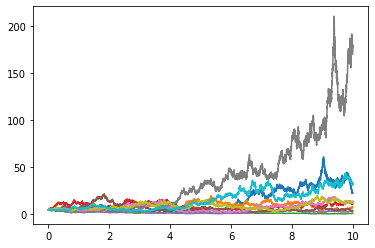

In [12]:
gbm.plot_paths(n=10, method='euler')

C:\Users\rumai\AppData\Local\Temp\ipykernel_14208\3408345724.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.arange(N_conv), np.log10(errors))


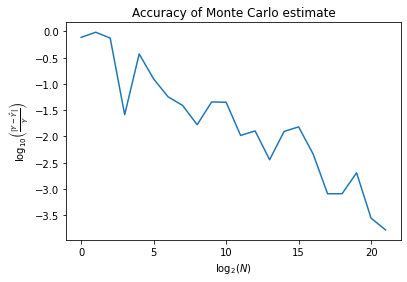

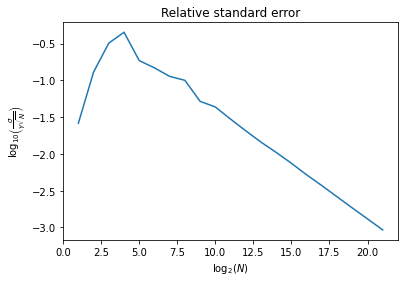

Convergence of standard error to 1% of true value for N = 32768
Convergence of standard error to 0.1% of true value for N = 2097152


In [9]:
#Code to study convergence of Monte Carlo
N_conv = 22 # max number of paths simulated in convergence test = 2^N_conv
K = 4
option = CallOption(K = K)
def get_convergence(N_conv, option):
    gbm_test = GeometricBrownianMotion(r=r, d=d, T = T, vol = vol, N_T= N_T, S_0 = S_0, seed = None)
    diff = np.zeros(N_conv)
    errors = np.zeros(N_conv)
    for i in range(N_conv):
        final_values = gbm_test.final_values(n=2**i)
        mc_price, _, standard_error = gbm_test.monte_carlo_price(final_values=final_values, option = option, return_variance=True)
        exact_price = CallPrice(r=r, d=d, T = T, vol = vol,K=K, S = S_0)
        diff[i] = np.abs(mc_price - exact_price)/exact_price
        errors[i] = standard_error/exact_price
    plt.figure()
    plt.plot(np.arange(N_conv), np.log10(diff))
    plt.xlabel(r'$\log _2 (N)$')
    plt.ylabel(r'$\log_{10} \left( \frac{|Y - \hat{Y}|}{Y} \right)$')
    plt.title('Accuracy of Monte Carlo estimate')

    plt.figure()
    plt.plot(np.arange(N_conv), np.log10(errors))
    plt.xlabel(r'$\log _2 (N)$')
    plt.ylabel(r'$\log_{10} \left( \frac{\sigma}{Y\sqrt{N}} \right)$')
    plt.title('Relative standard error')

    plt.show() 

    i = 4
    while errors[i] > 0.01 and i<len(errors):
        i+=1

    print(f'Convergence of standard error to 1% of true value for N = {2**i}')

    i = 4
    while errors[i] > 0.001 and i<len(errors):
        i+=1
    print(f'Convergence of standard error to 0.1% of true value for N = {2**i}')

get_convergence(N_conv, option)


We check the convergence of our Monte Carlo pricer. Let $N$ be the number of simulated stocks used to estimate the price, $Y$ the actual price, $\hat{Y}$ our estimate, and $\sigma^2$ the variance of . We plot the relative difference between our estimate and the actual price against $\log_2 N$, and find convergence to $0.1 \%$ of the true value when $N \sim 10^5$. On analysis of standard errors, we find a relative standard error of less than $0.1 \%$ for $N \sim 10^6$, while an agreement up to $1 \%$ is reached by $N \sim 10^4$. Thereore it will be appropriate to use $N = 10^6$ for our purposes, balancing accuracy and computational cost.